# Markov Chain Monte Carlo Example 2
Author: Michael D. Shields
Date: May 15, 2018

In this example, the Metropolis-Hastings, component-wise modified Metropolis-Hastings, and affine invariant ensemble sampler with stretch moves are employed to generate samples from a Rosenbrock distribution. The method illustrates various aspects of the UQpy MCMC class. In these illustrations, the Rosenbrock pdf is defined using the 'custom_pdf.py' script located in the current working directory. For examples where the pdf is defined directly in the script as a python function, see Markov Chain Monte Carlo Example 1.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the MCMC class from UQpy.

In [1]:
from UQpy.SampleMethods import MCMC
import numpy as np
import matplotlib.pyplot as plt
import time

Run MCMC using the defined Rosenbrock distribution for 100 samples using the component-wise modified Metropolis-Hastings Algorithm. Here we use the following parameters.
    - Normal proposal pdf with unit variance.
    - Samples are accepted/rejected based on the ratio of the joint pdf. This is necessary as the dependence of the Rosenbrock pdf does not allow us to accept/reject based on independent marginals.
    - Notice that pdf_target references the Rosenbrock function from 'custom_pdf.py' and therefore it must be defined as a string.
    - A jumping with of 1000 samples. 
    - Seed value is set to the default.
    - No burn (nburn) is specified.
These samples serve as the seed values for MCMC using the affine invariant ensemble sampler with stretch moves.

In [2]:
x = MCMC(dimension=2, pdf_proposal_type='Normal', pdf_proposal_scale=[1.,1.], pdf_target_type='joint_pdf',
         pdf_target='Rosenbrock', pdf_target_params = [20], algorithm='MMH', jump=1000, nsamples=100, seed=None)

Run MCMC using the defined Rosenbrock distribution to generate 1000 samples using the affine invariant ensemble sampler with stretch moves. Note the following:
    - The scale parameter for the stretch moves is set to 2. This is standard from the literature. (Goodman and Weare, 2010). 
    - x.samples, the 100 samples generated above, are used as the seed for the stretch algorithm. This means we propagate an ensemble of size 100.

In [3]:
t = time.time()
z = MCMC(dimension=2, pdf_proposal_type=None, pdf_proposal_scale=2, pdf_target_type='joint_pdf',
         pdf_target='Rosenbrock', pdf_target_params=[20], algorithm='Stretch', jump=1000, nsamples=1000, seed=x.samples)
t_stretch = time.time()-t
print(t_stretch)

12.331275701522827


Run MCMC to generate 1000 samples from the Rosenbrock distribution using the component-wise modified Metropolis-Hastings algorithm and jumping width of 1000 samples for comparison with the stretch MCMC. Note the following:
    - pdf_proposal_scale = 1. This assigns a unit standard deviation to both dimensions without explicitly specifying each dimension, as was the case in the previous call of the MMH algorithm.

In [4]:
t2 = time.time()
y = MCMC(dimension=2, pdf_proposal_type='Normal', pdf_proposal_scale=1, pdf_target_type='joint_pdf',
         pdf_target='Rosenbrock', pdf_target_params=[20], algorithm='MMH', jump=1000, nsamples=1000, seed=None)
t_MMH = time.time()-t2
print(t_MMH)

20.968231201171875


Run MCMC to generate 1000 samples from the Rosenbrock distribution using the conventional Metropolis-Hastings algorithm and jumping width of 1000 samples for comparison with the stretch MCMC and MMH.

In [5]:
t3 = time.time()
w = MCMC(dimension=2, pdf_proposal_type='Normal', pdf_proposal_scale=[1,1], pdf_target_type='joint_pdf',
         pdf_target='Rosenbrock', pdf_target_params=[20], algorithm='MH', jump=1000, nsamples=1000, seed=None)
t_MH = time.time()-t3
print(t_MH)

122.28062319755554


Notice the difference in computational expense.
    - The affine invariant ensemble sampler is the least expensive computationally, but requires and ensemble of seed samples.
    - The MMH comes at slightly larger computational expense, but requires only one seed sample.
    - The MH is computationally burdensome. This is caused by the large effort required by the built-in python multivariate normal pdf evaluation.

Plot the sample sets from 'stretch', 'MMH', and 'MH' for comparison

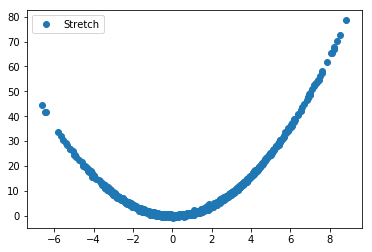

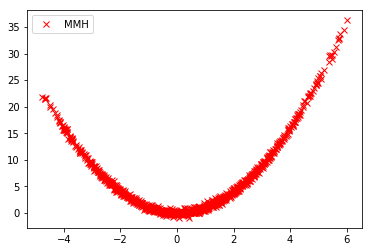

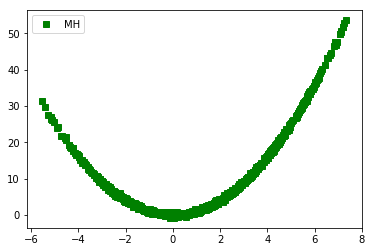

In [6]:
plt.plot(z.samples[:,0],z.samples[:,1],'o')
plt.legend(['Stretch'])
plt.show()
plt.plot(y.samples[:,0],y.samples[:,1],'rx')
plt.legend(['MMH'])
plt.show()
plt.plot(w.samples[:,0],w.samples[:,1],'gs')
plt.legend(['MH'])
plt.show()

A note on the distribution of samples:
    - For this distribution, the MH and MMH algorithms have very long correlation length (~100,000 samples, see Goodman and Weare, 2010). As a result, the affine invariant sampler with stretch moves produces a set of samples that is less correlated given a fixed jumping width of 1000 samples. 